In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
review_yelp = "yelp_dataset_2019/review.json" 
tips_yelp = "yelp_dataset_2019/tip.json"
business_yelp = "yelp_dataset_2019/business.json"
users_yelp ="yelp_dataset_2019/user.json"

# Reading in Data

In [3]:
reviews = []
with open(review_yelp,encoding="utf8") as f:
    for line in f:
        reviews.append(json.loads(line))
print("There are " + str(len(reviews)) + " reviews.")

There are 6685900 reviews.


In [44]:
businesses = []
with open(business_yelp,encoding="utf8") as f:
    for line in f:
        businesses.append(json.loads(line))
print("There are " + str(len(businesses)) + " businesses.")

There are 192609 businesses.


In [36]:
users = []
with open(users_yelp,encoding="utf8") as f:
    for line in f:
        users.append(json.loads(line))
print("There are " + str(len(users)) + " users.")

There are 1637138 users.


In [7]:
tips = []
with open(tips_yelp,encoding="utf8") as f:
    for line in f:
        tips.append(json.loads(line))
print("There are " + str(len(tips)) + " tips")

There are 1223094 tips


# Distribution of Reviews

In [11]:
prolific_reviewers = Counter([review['user_id'] for review in reviews]) 
prolific_reviewers.most_common(10)[:]               #Finding the users with the most reviews

[('CxDOIDnH8gp9KXzpBHJYXw', 4129),
 ('bLbSNkLggFnqwNNzzq-Ijw', 2354),
 ('PKEzKWv_FktMm2mGPjwd0Q', 1822),
 ('ELcQDlf69kb-ihJfxZyL0A', 1764),
 ('DK57YibC5ShBmqQl97CKog', 1727),
 ('U4INQZOPSUaj8hMjLlZ3KA', 1559),
 ('QJI9OSEn6ujRCtrX06vs1w', 1496),
 ('d_TBs6J3twMy9GChqUEXkg', 1360),
 ('hWDybu_KvYLSdEFzGrniTw', 1355),
 ('cMEtAiW60I5wE_vLfTxoJQ', 1255)]

In [12]:
num_reviews_left = Counter([x[1] for x in prolific_reviewers.most_common()])

num_reviews_left.most_common(5)

[(1, 858483), (2, 271476), (3, 138003), (4, 83046), (5, 54953)]

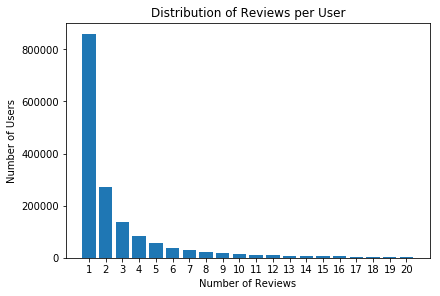

In [96]:
Xs = [x[0] for x in num_reviews_left.most_common()]
Ys = [x[1] for x in num_reviews_left.most_common()]
plt.bar(Xs[:20], Ys[:20])
plt.xticks(range(1,21))
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Users")
plt.title("Distribution of Reviews per User")
plt.tight_layout(0.3)
#plt.savefig("Dist_Reviews_by_Users.pdf",dpi=600)
plt.show()

In [5]:
prolific_business = Counter([review['business_id'] for review in reviews]) 
prolific_business.most_common(10)[:]                           #Finding the businesses with the most reviews

[('4JNXUYY8wbaaDmk3BPzlWw', 8570),
 ('RESDUcs7fIiihp38-d6_6g', 8568),
 ('K7lWdNUhCbcnEvI0NhGewg', 6887),
 ('f4x1YBxkLrZg652xt2KR5g', 5847),
 ('cYwJA2A6I12KNkm2rtXd5g', 5575),
 ('DkYS3arLOhA8si5uUEmHOw', 5206),
 ('2weQS-RnoOBhb1KsHKyoSQ', 4534),
 ('5LNZ67Yw9RD6nf4_UhXOjw', 4522),
 ('iCQpiavjjPzJ5_3gPD5Ebg', 4351),
 ('SMPbvZLSMMb7KU76YNYMGg', 4350)]

In [6]:
num_reviews_per_bus = Counter([x[1] for x in prolific_business.most_common()])

num_reviews_per_bus.most_common(5)

[(3, 31940), (4, 18500), (5, 13722), (6, 10926), (7, 9003)]

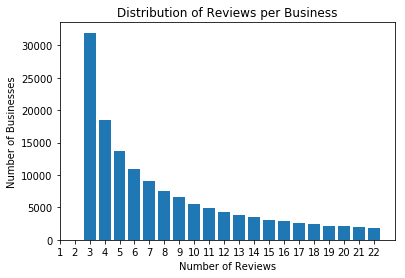

In [79]:
Xs = [x[0] for x in num_reviews_per_bus.most_common()]
Ys = [x[1] for x in num_reviews_per_bus.most_common()]
plt.bar(Xs[:20], Ys[:20])
plt.xticks(range(1,23))
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Businesses")
plt.title("Distribution of Reviews per Business")
#plt.savefig("Dist_Reviews_per_Business.pdf",dpi=600)
plt.show()

# Distribution of Stars

In [28]:
stars_counter = Counter([business['stars'] for business in businesses])

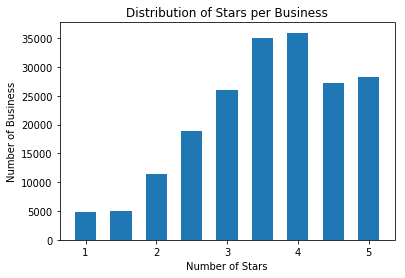

In [81]:
Xs = [x[0] for x in stars_counter.most_common()]
Ys = [x[1] for x in stars_counter.most_common()]
plt.bar(Xs, Ys,width=0.3)
plt.xlabel("Number of Stars")
plt.ylabel("Number of Business")
plt.title("Distribution of Stars per Business")
#plt.savefig("Dist_stars_per_bus.pdf",dpi=600)
plt.show()

In [22]:
stars = Counter([review['stars'] for review in reviews])

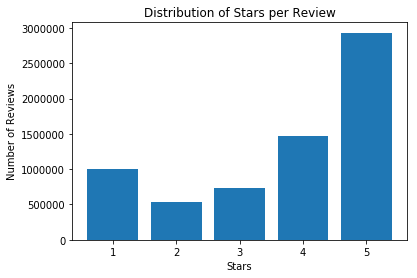

In [84]:
Xs = [x[0] for x in Counter(stars).most_common()]
Ys = [x[1] for x in Counter(stars).most_common()]
plt.bar(Xs, Ys)
plt.xlabel("Stars")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Stars per Review")
#plt.savefig("Dist_stars_per_review.pdf",dpi=600)
plt.show()

In [38]:
average_stars = Counter([user['average_stars'] for user in users])

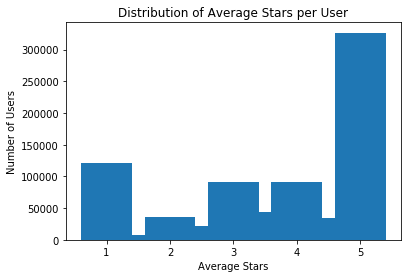

In [86]:
Xs = [x[0] for x in Counter(average_stars).most_common()]
Ys = [x[1] for x in Counter(average_stars).most_common()]
plt.bar(Xs, Ys)
plt.xlabel("Average Stars")
plt.ylabel("Number of Users")
plt.title("Distribution of Average Stars per User")
#plt.savefig("Dist_stars_per_user.pdf",dpi=600)
plt.show()

In [43]:
del users

# Cities

In [31]:
busy_cities = Counter([business['city'] for business in businesses]).most_common(30)
# Finding the cities with the most businesses
busy_cities[:]

[('Las Vegas', 29370),
 ('Toronto', 18906),
 ('Phoenix', 18766),
 ('Charlotte', 9509),
 ('Scottsdale', 8837),
 ('Calgary', 7736),
 ('Pittsburgh', 7017),
 ('Montréal', 6449),
 ('Mesa', 6080),
 ('Henderson', 4892),
 ('Tempe', 4550),
 ('Chandler', 4309),
 ('Cleveland', 3605),
 ('Glendale', 3543),
 ('Madison', 3494),
 ('Gilbert', 3462),
 ('Mississauga', 3112),
 ('Peoria', 1919),
 ('Markham', 1766),
 ('North Las Vegas', 1548),
 ('Champaign', 1262),
 ('North York', 1205),
 ('Surprise', 1148),
 ('Scarborough', 1103),
 ('Richmond Hill', 1026),
 ('Brampton', 1002),
 ('Concord', 990),
 ('Vaughan', 919),
 ('Goodyear', 855),
 ('Etobicoke', 793)]

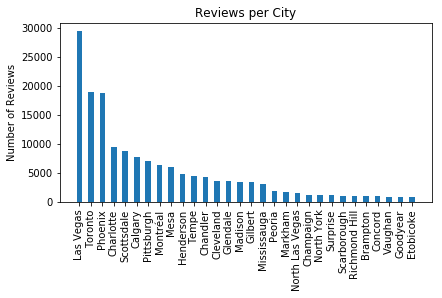

In [93]:
cities = []
numbers = []
for x in busy_cities:
    cities.append(x[0])
for x in busy_cities:
    numbers.append(x[1])
x = np.linspace(0,30,30)
y = np.linspace(-2,28,30)
plt.bar(x,numbers, width = 0.5,tick_label=cities)
plt.xticks(rotation=90)
plt.ylabel("Number of Reviews")
plt.title("Reviews per City")
plt.tight_layout(0.2)
#plt.savefig("cities.pdf",dpi=600)
plt.show()

# Identifying most reviewed businesses

In [49]:
for i in range(len(businesses)):
    if businesses[i]['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw':
        print(businesses[i]['name'])

Mon Ami Gabi 82250


In [51]:
for i in range(len(businesses)):
    if businesses[i]['business_id'] == 'RESDUcs7fIiihp38-d6_6g':
        print(businesses[i]['name'])

Bacchanal Buffet 89206


In [52]:
for i in range(len(businesses)):
    if businesses[i]['business_id'] == 'K7lWdNUhCbcnEvI0NhGewg':
        print(businesses[i]['name'])

Wicked Spoon 35199


In [53]:
for i in range(len(businesses)):
    if businesses[i]['business_id'] == 'f4x1YBxkLrZg652xt2KR5g':
        print(businesses[i]['name'])

Hash House A Go Go 58852
